__6**.__ Найти все корни уравнения:
    
### $$f(x)=g(x)$$

на участке $[0, 20]$

Где $y_{1}=f(x)$ и $y_{2}=g(x)$ - функции из предыдущего решения.

{1.8032646, 5.766441, 8.0881336, 12.048579, 14.3729975, 18.330722}


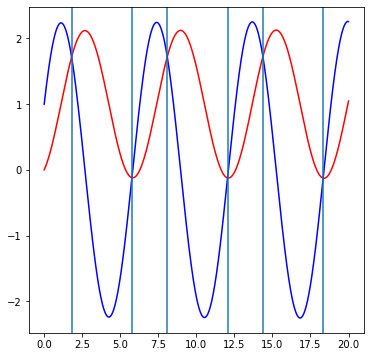

In [12]:
from scipy.optimize import fsolve, broyden2
from scipy.interpolate import splev, splrep
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


def f_delta(delta, f_prev, g_prev):
    return f_prev + 0.5*g_prev*delta


def g_delta(delta, g_prev, f_prev):
    return g_prev + (2 - 2*f_prev)*delta


f = [0]
g = [1]
n = 20000
start = 0
end = 20
delta = (end - start) / n

for i in range(1, n):
    f.append(f_delta(delta, f[i - 1], g[i - 1]))
    g.append(g_delta(delta, g[i - 1], f[i - 1]))

x = np.linspace(start, end, n)
spl_f = splrep(x, f)
spl_g = splrep(x, g)


def equations(p):
    return (splev(p, spl_f) - splev(p, spl_g))


solv = set()
for p in np.arange (start, end, 0.5):
    s, info, ier, mesg =  fsolve(equations, p, full_output=True)
    if ier == 1 and (start <= s <= end):
        solv.add(int(s*10**7)/10**7)
            
print (solv)
            
plt.figure(figsize=(6,6))

plt.plot(x, f, c='r')
plt.plot(x, g, c='b')

for p in solv:
    plt.axvline(x=p)

plt.show()